<a href="https://colab.research.google.com/github/LuizGuilherme07/TrabalhoDurvalML/blob/main/Machine_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Etapa 1 — Análise Exploratória de Dados (EDA)
Dataset: used_cars_price.csv  
Alvo (variável que vamos prever): price_brl  

## Objetivos da EDA
- Entender as variáveis do dataset
- Identificar problemas de qualidade (missing, outliers)
- Explorar padrões e correlações
- Documentar descobertas

---

## Índice
1. Importação de bibliotecas  
2. Carregamento dos dados  
3. Visão geral do dataset  
4. Análise de valores faltantes  
5. Análise da variável alvo (price_brl)  
6. Análise univariada (variáveis numéricas)  
7. Análise univariada (variáveis categóricas)  
8. Correlações  
9. Análise bivariada (variáveis → preço)  
10. Identificação de outliers  
11. Conclusões

In [ ]:
# 1) Importação de bibliotecas para análise exploratória

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração visual dos gráficos
sns.set(style="whitegrid", context="notebook")
plt.rcParams['figure.figsize'] = (10, 5)


In [ ]:
# 2) Carregamento dos dados

df = pd.read_csv("/content/used_cars_price.csv")
df.head()


,car_id,brand,model_year,mileage_km,fuel_type,engine_size_liters,horsepower,transmission,drivetrain,condition,...,airbags_count,abs_brakes,interior_material,sound_system,sunroof,parking_sensors,warranty_months,imported,color,price_brl
0,CAR00197,Chevrolet,2023,200861.0,Flex,1.4,102.0,Manual,Dianteira,Excelente,...,8.0,Sim,Tecido,Premium,Não,Sim,9.0,Não,Cinza,21086
1,CAR00987,Honda,2021,9994.0,Diesel,2.0,92.0,Automática,Dianteira,Bom,...,3.0,Sim,Couro Sintético,Multimídia,Não,Não,36.0,Sim,Azul,99872
2,CAR01091,Hyundai,2015,212746.0,Diesel,1.8,155.0,Automática,Dianteira,Regular,...,1.0,Sim,Couro Legítimo,Premium,Sim,Não,9.0,Sim,Branco,15987
3,CAR00388,Fiat,2010,220516.0,Etanol,1.0,139.0,Automática,Traseira,Bom,...,0.0,Sim,Couro Legítimo,Multimídia,Não,Sim,15.0,Sim,Prata,8000
4,CAR02222,Fiat,2018,166081.0,Flex,1.4,203.0,Automática,Dianteira,Regular,...,5.0,Sim,Tecido,Básico,Não,Não,4.0,Não,Branco,27552


In [ ]:
# 3) Visão geral do dataset

print("Dimensão do dataset:", df.shape)

print("\nTipos de dados:")
display(df.dtypes)

print("\nEstatísticas descritivas (numéricas):")
display(df.describe())


Dimensão do dataset: (2520, 26)

Tipos de dados:


,0
car_id,object
brand,object
model_year,int64
mileage_km,float64
fuel_type,object
engine_size_liters,float64
horsepower,float64
transmission,object
drivetrain,object
condition,object



Estatísticas descritivas (numéricas):


,model_year,mileage_km,engine_size_liters,horsepower,previous_owners,airbags_count,warranty_months,price_brl
count,2520.000000,2481.000000,2520.000000,2481.000000,2480.000000,2480.000000,2480.000000,2520.000000
mean,2016.973810,129447.882306,1.517540,184.245062,3.071774,4.027016,18.083065,34712.196825
std,4.345092,73515.605475,0.415167,69.186619,1.424618,2.569815,10.609328,27937.183389
min,2010.000000,-7240.000000,1.000000,70.000000,-2.000000,0.000000,0.000000,5169.000000
25%,2013.000000,67790.000000,1.300000,125.000000,2.000000,2.000000,9.000000,10898.750000
50%,2017.000000,129881.000000,1.400000,181.000000,3.000000,4.000000,18.000000,29880.500000
75%,2021.000000,188419.000000,1.800000,241.000000,4.000000,6.000000,27.000000,49250.500000
max,2030.000000,487001.000000,3.000000,492.000000,5.000000,8.000000,36.000000,243724.000000


### 3. Visão Geral do Dataset

O dataset contém **2520 linhas** e **26 colunas**, ou seja, temos registros de 2520 carros usados, cada um descrito por 26 variáveis (como marca, ano, quilometragem, tipo de combustível, número de airbags, etc.).

Essas colunas se dividem em:

**Variáveis Numéricas:** relacionadas a medidas contínuas, como ano, quilometragem e preço.
**Variáveis Categóricas:** relacionadas a categorias, como marca, combustível, transmissão e cor.
**Variável Alvo (y):** `price_brl` — representa o **preço do carro**, que é o valor que queremos prever.



In [ ]:
# Separando variáveis numéricas e categóricas

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Variáveis Numéricas:", numeric_cols)
print("\nVariáveis Categóricas:", categorical_cols)


Variáveis Numéricas: ['model_year', 'mileage_km', 'engine_size_liters', 'horsepower', 'previous_owners', 'airbags_count', 'warranty_months', 'price_brl']

Variáveis Categóricas: ['car_id', 'brand', 'fuel_type', 'transmission', 'drivetrain', 'condition', 'accident_history', 'service_history', 'air_conditioning', 'power_steering', 'power_windows', 'abs_brakes', 'interior_material', 'sound_system', 'sunroof', 'parking_sensors', 'imported', 'color']


In [ ]:
# 4) Análise de valores faltantes

missing = df.isna().sum().sort_values(ascending=False)
missing_percent = (df.isna().mean().sort_values(ascending=False) * 100).round(2)

missing_df = pd.DataFrame({
    'Valores Faltantes': missing,
    '% Faltantes': missing_percent
})

missing_df


,Valores Faltantes,% Faltantes
airbags_count,40,1.59
previous_owners,40,1.59
warranty_months,40,1.59
horsepower,39,1.55
mileage_km,39,1.55
brand,0,0.00
engine_size_liters,0,0.00
car_id,0,0.00
fuel_type,0,0.00
model_year,0,0.00


### 4. Análise de Valores Faltantes

Ao analisar os valores faltantes no dataset, observamos que apenas algumas variáveis apresentam uma pequena porcentagem de dados ausentes:

| Variável | % de Faltantes |
|---------|----------------|
| `airbags_count` | ~1.59% |
| `previous_owners` | ~1.59% |
| `warranty_months` | ~1.59% |
| `horsepower` | ~1.55% |
| `mileage_km` | ~1.55% |

As demais variáveis não apresentam valores ausentes.

Como a porcentagem de valores faltantes é **baixa (≈ 1,5%)**, isso indica que o dataset possui **boa qualidade de preenchimento**.  
No entanto, esses valores faltantes devem ser **tratados na Etapa 2 (Pré-processamento)**.




Resumo estatístico:


,price_brl
count,2520.000000
mean,34712.196825
std,27937.183389
min,5169.000000
25%,10898.750000
50%,29880.500000
75%,49250.500000
max,243724.000000


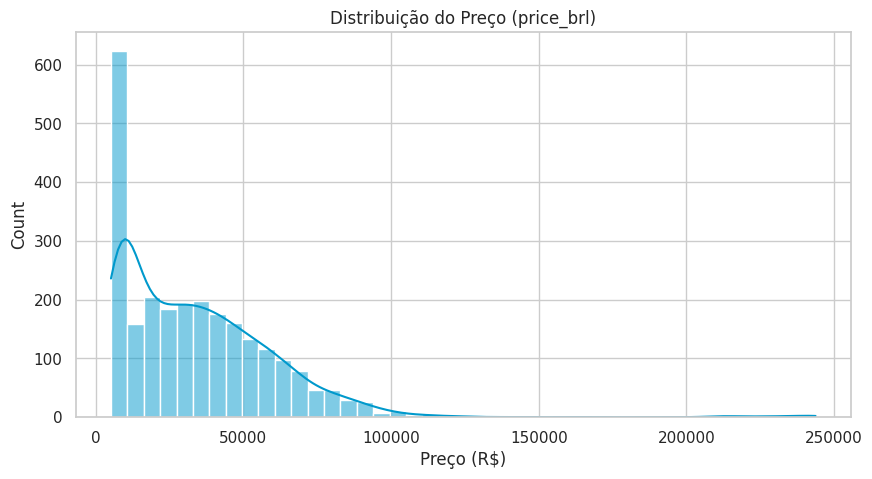

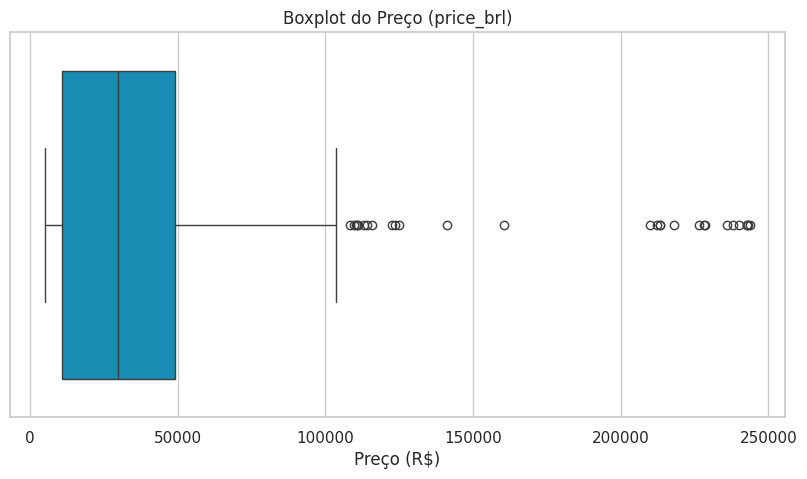

In [ ]:
# 5) Análise da variável alvo (price_brl)

y = df['price_brl']

print("Resumo estatístico:")
display(y.describe())

# Histograma
sns.histplot(y, kde=True, color="#0099cc")
plt.title("Distribuição do Preço (price_brl)")
plt.xlabel("Preço (R$)")
plt.show()

# Boxplot para ver possíveis outliers
sns.boxplot(x=y, color="#0099cc")
plt.title("Boxplot do Preço (price_brl)")
plt.xlabel("Preço (R$)")
plt.show()


### 5. Análise da Variável Alvo (`price_brl`)

A variável `price_brl` representa o preço final de venda de cada carro no dataset.

Ao analisar sua distribuição, observamos que:

- A maior parte dos carros está na faixa de **R$ 20.000 a R$ 60.000**.
- A distribuição é **assimétrica à direita (skew positivo)**, ou seja, existem alguns carros muito caros que puxam a cauda da distribuição para valores mais altos.
- O boxplot confirma a presença de **outliers** (carros com preços muito acima da média).
- Esses outliers **não devem ser removidos nesta etapa**, pois podem representar carros premium ou importados.

**Conclusão:**  
A variável alvo não segue uma distribuição normal, o que poderá sugerir, na fase de modelagem, o uso de transformações como **logaritmo** para reduzir a assimetria.


🔹 ANÁLISE DA VARIÁVEL NUMÉRICA: model_year


,model_year
count,2520.000000
mean,2016.973810
std,4.345092
min,2010.000000
25%,2013.000000
50%,2017.000000
75%,2021.000000
max,2030.000000


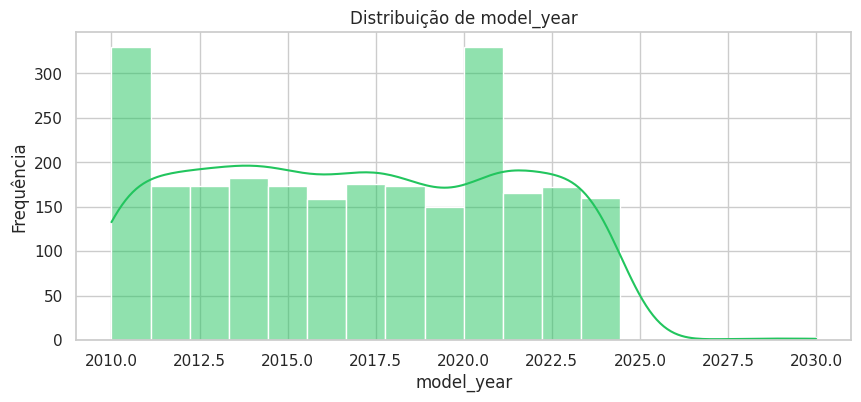

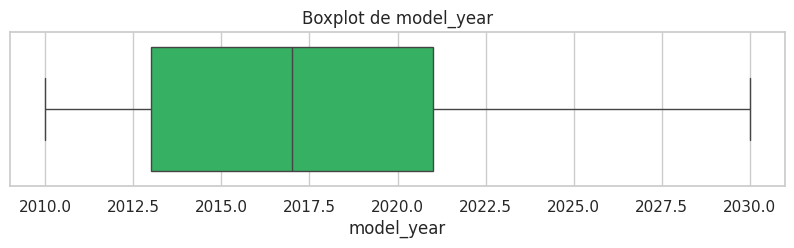

🔹 ANÁLISE DA VARIÁVEL NUMÉRICA: mileage_km


,mileage_km
count,2481.000000
mean,129447.882306
std,73515.605475
min,-7240.000000
25%,67790.000000
50%,129881.000000
75%,188419.000000
max,487001.000000


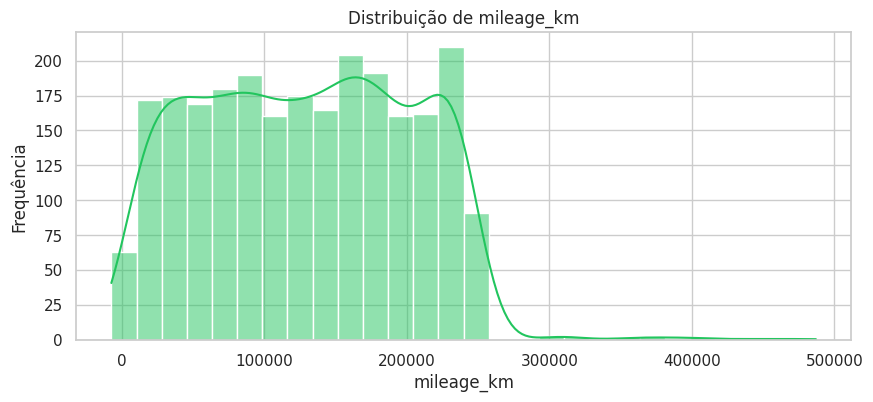

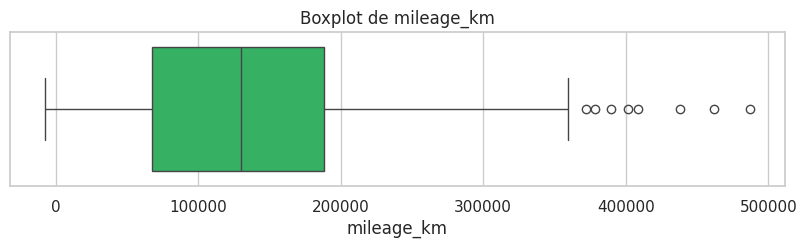

🔹 ANÁLISE DA VARIÁVEL NUMÉRICA: engine_size_liters


,engine_size_liters
count,2520.000000
mean,1.517540
std,0.415167
min,1.000000
25%,1.300000
50%,1.400000
75%,1.800000
max,3.000000


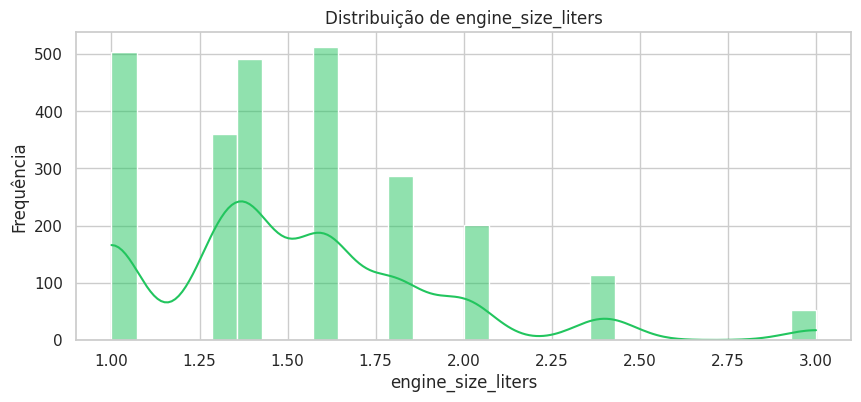

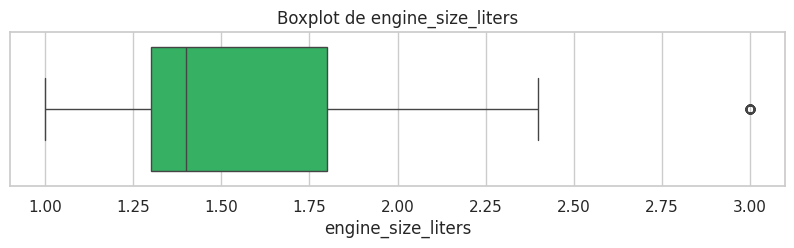

🔹 ANÁLISE DA VARIÁVEL NUMÉRICA: horsepower


,horsepower
count,2481.000000
mean,184.245062
std,69.186619
min,70.000000
25%,125.000000
50%,181.000000
75%,241.000000
max,492.000000


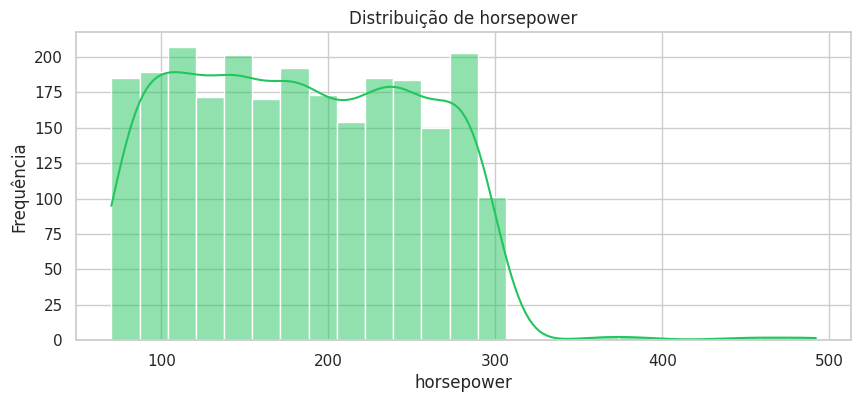

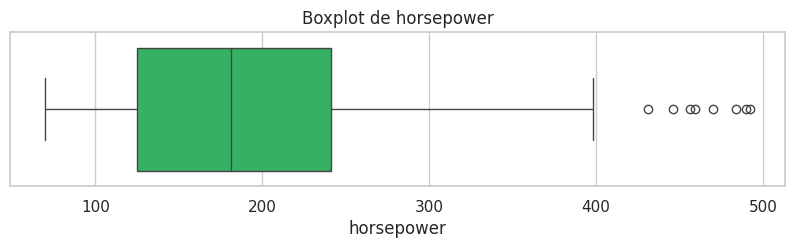

🔹 ANÁLISE DA VARIÁVEL NUMÉRICA: previous_owners


,previous_owners
count,2480.000000
mean,3.071774
std,1.424618
min,-2.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


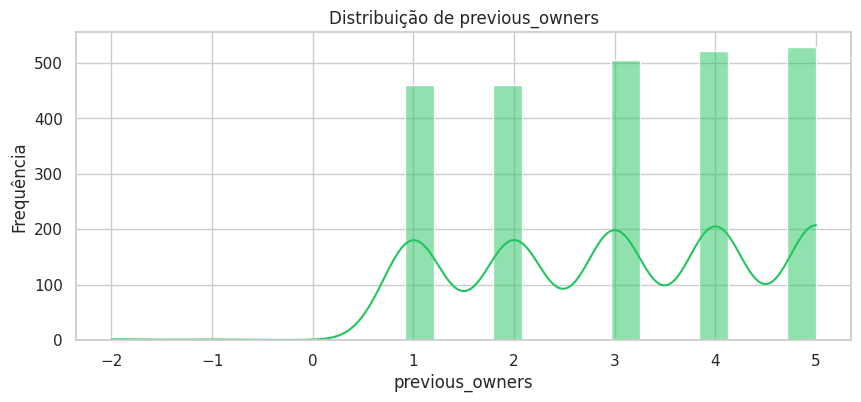

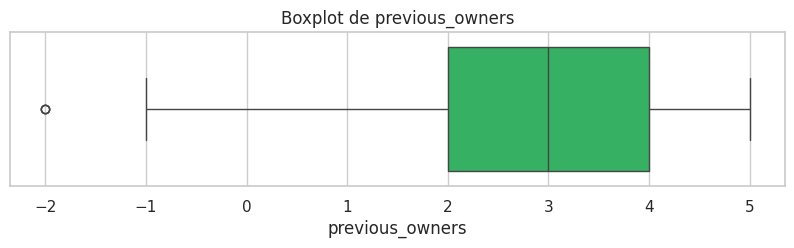

🔹 ANÁLISE DA VARIÁVEL NUMÉRICA: airbags_count


,airbags_count
count,2480.000000
mean,4.027016
std,2.569815
min,0.000000
25%,2.000000
50%,4.000000
75%,6.000000
max,8.000000


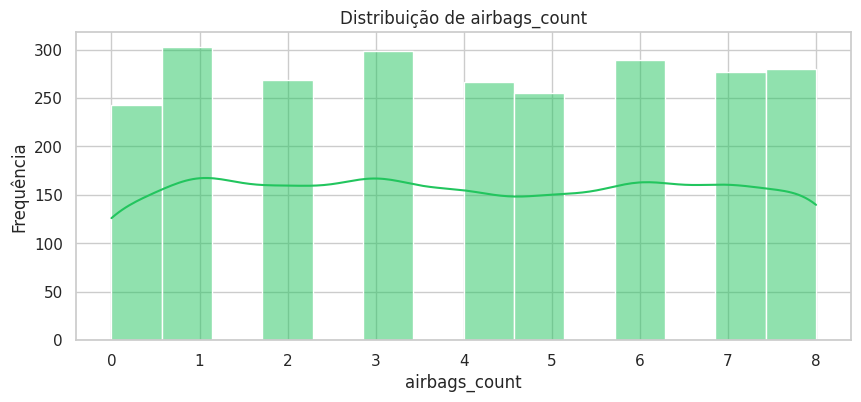

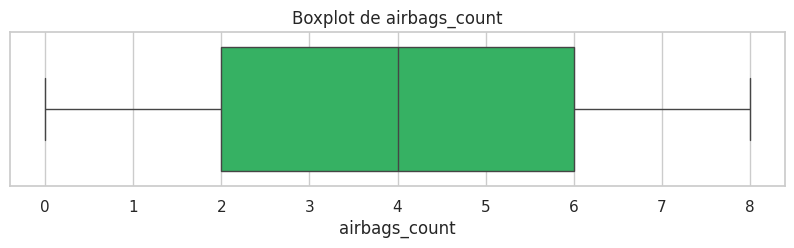

🔹 ANÁLISE DA VARIÁVEL NUMÉRICA: warranty_months


,warranty_months
count,2480.000000
mean,18.083065
std,10.609328
min,0.000000
25%,9.000000
50%,18.000000
75%,27.000000
max,36.000000


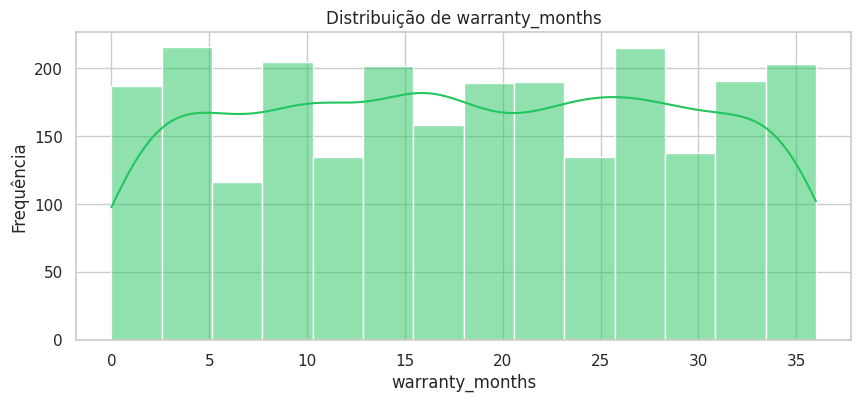

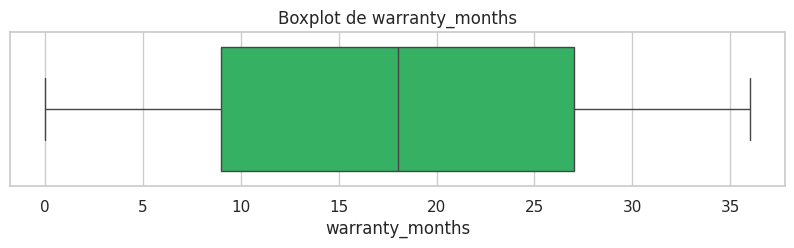

In [ ]:
# 6) Análise Univariada — Variáveis Numéricas (Organizada)

for col in numeric_cols:
    if col != 'price_brl':

        print("====================================================")
        print(f"🔹 ANÁLISE DA VARIÁVEL NUMÉRICA: {col}")
        print("====================================================")

        # Estatísticas principais
        display(df[col].describe())

        # Histograma
        plt.figure(figsize=(10,4))
        sns.histplot(df[col], kde=True, color="#22c55e")
        plt.title(f"Distribuição de {col}")
        plt.xlabel(col)
        plt.ylabel("Frequência")
        plt.show()

        # Boxplot (para ver outliers)
        plt.figure(figsize=(10,2))
        sns.boxplot(x=df[col], color="#22c55e")
        plt.title(f"Boxplot de {col}")
        plt.xlabel(col)
        plt.show()


### Análise da Variável Numérica: `model_year`

A variável `model_year` representa o ano do modelo do carro.

**Observações da distribuição:**
- A maior parte dos veículos está concentrada entre **2010 e 2023**, indicando que o dataset é composto principalmente de carros **recentes e seminovos**.
- Existe uma leve **concentração maior entre 2012 e 2018**, o que pode indicar um volume maior de revenda de carros dessa faixa de idade.
- A distribuição não é simétrica; há poucos carros muito novos (2024+) e praticamente não há modelos muito antigos.

**Observações do boxplot:**
- Não há presença significativa de outliers extremos para o ano. Os valores parecem todos plausíveis.
- A variação entre os anos indica diversidade na idade dos veículos, o que é útil para prever preço.

**Impacto provável no preço:**
- Carros mais novos tendem a ter preço maior.
- Espera-se uma **correlação positiva moderada entre model_year e price_brl** (quanto mais novo, maior o preço).

**Resumo:**
- Variável está **limpa**, sem valores absurdos.
- Deve ser uma **feature importante** para o modelo de previsão.


### Análise da Variável Numérica: `mileage_km`

A variável `mileage_km` representa a quilometragem total rodada pelo veículo.

**Observações da distribuição:**
- A maior parte dos carros possui **entre 50.000 km e 200.000 km**, o que é esperado para veículos usados.
- A distribuição é **assimétrica à direita**, pois existe um número reduzido de carros com quilometragem extremamente alta (acima de 300.000 km).
- Também há um pequeno grupo de carros com quilometragem muito baixa (próximo de 0), possivelmente veículos seminovos ou recém-comprados.

**Observações do boxplot:**
- Identificamos **outliers** na extremidade direita, ou seja, carros com quilometragens muito acima do padrão.
- Esses outliers **não devem ser removidos por enquanto**, porque podem representar carros usados em frotas, táxis ou proprietários que rodam longas distâncias.

**Impacto provável no preço:**
- Existe tendência de que **quanto maior a quilometragem, menor o preço do carro**, pois maior desgaste reduz valor de mercado.

**Resumo:**
- Variável relevante para o modelo, pois influencia diretamente no preço.
- Possui outliers, que serão avaliados e possivelmente tratados na **(Pré-Processamento)**.


### Análise da Variável Numérica: `engine_size_liters`

A variável `engine_size_liters` representa o tamanho do motor do veículo, medido em litros (L).

**Observações da distribuição:**
- A maior parte dos carros possui motores entre **1.0L e 2.0L**, o que é característico de carros populares e médios.
- Há concentrações visíveis em tamanhos padronizados de mercado:
  - **1.0L**
  - **1.3L / 1.4L**
  - **1.6L**
  - **1.8L**
  - **2.0L**
- Existe uma presença menor de motores **acima de 2.0L**, que geralmente são veículos mais potentes, SUVs ou importados.

**Observações do boxplot:**
- Alguns pontos aparecem como **outliers**, especialmente acima de **2.5L**, mas isso é esperado:
  - São veículos esportivos, SUVs ou versões premium.
- Esses outliers **não devem ser removidos neste momento**.

**Impacto provável no preço:**
- Motores maiores tendem a ter **preço maior**, principalmente quando associados a marcas/séries premium.
- Espera-se uma **correlação positiva**, mas não necessariamente muito alta, pois o preço também depende de marca, ano e estado.

**Resumo:**
- A variável possui distribuição coerente com o mercado brasileiro.
- Os valores são plausíveis.
- Provavelmente será uma feature **útil para previsão de preço**.


### Análise da Variável Numérica: `horsepower`

A variável `horsepower` representa a potência do motor medida em cavalos (HP).

**Observações da distribuição:**
- A maior parte dos veículos possui potência entre **80 HP e 220 HP**, o que corresponde a carros compactos, populares e sedãs de uso comum.
- A distribuição é **assimétrica à direita**, pois há uma quantidade pequena de veículos com potência mais alta (acima de 300 HP), que geralmente pertencem a categorias esportivas ou premium.
- A densidade é relativamente uniforme entre 100 e 220 HP, indicando grande variedade de configurações no mercado.

**Observações do boxplot:**
- Existem **outliers** acima de ~260 HP.
- Esses pontos representam veículos com motores esportivos ou modelos de alto desempenho.
- Esses outliers são **válidos e não devem ser removidos nesta etapa**, pois carregam informação importante sobre veículos de categoria superior.

**Impacto provável no preço:**
- Potência mais alta tende a estar relacionada com veículos mais caros, mas o impacto dependerá também de fatores como:
  - marca
  - ano do veículo
  - tipo de transmissão
  - tamanho do motor (`engine_size_liters`)

Em resumo, `horsepower` provavelmente terá **correlação positiva moderada** com o preço.

**Conclusão:**
- Variável importante para o modelo.
- Apresenta outliers legítimos.
- Será analisada novamente na matriz de correlação.


### Análise da Variável Numérica: `previous_owners`

A variável `previous_owners` indica **quantos donos o carro já teve** antes do atual anúncio.

**Observações da distribuição:**
- A maior concentração de veículos está entre **1 e 3 proprietários anteriores**, o que é comum no mercado de carros usados.
- Existem alguns veículos com **4 ou 5 proprietários**, o que pode indicar uso prolongado e maior desgaste.
- A distribuição é **discreta e categórica**, já que o número de proprietários é um valor inteiro (não contínuo).

**Observações do boxplot:**
- Existem alguns valores isolados (outliers) acima da média, porém **esses valores são possíveis e reais**, já que um carro pode ter trocado de dono muitas vezes.
- O boxplot mostra uma tendência de **maior variabilidade acima de 3 proprietários**.

**Impacto provável no preço:**
- Geralmente, **quanto mais proprietários o carro teve, menor tende a ser o seu valor de mercado**, pois:
  - Mais donos pode significar **mais anos de uso**.
  - A percepção de desgaste aumenta.
  - A confiabilidade histórica é menor.

Assim, espera-se uma **correlação negativa** entre `previous_owners` e `price_brl`.

**Resumo:**
- Variável importante e coerente.
- Possui valores legítimos, mas apresentará impacto significativo no preço.
- Será explorada novamente nas análises de **correlação e regressão**.


### Análise da Variável Numérica: `airbags_count`

A variável `airbags_count` representa **quantos airbags o veículo possui**, refletindo diretamente o nível de **segurança** oferecido.

**Observações da Distribuição:**
- A maior parte dos veículos está entre **2 e 6 airbags**, o que é compatível com carros populares e sedans intermediários.
- Veículos com **0 airbags** também aparecem na distribuição, indicando modelos mais antigos ou versões básicas.
- Já veículos com **7 ou 8 airbags** representam modelos **mais seguros, geralmente mais novos e de categorias premium**.

**Boxplot e Outliers:**
- A distribuição é **discreta**, pois o número de airbags é um valor inteiro.
- Os valores extremos (como 0 ou 8 airbags) **não são outliers artificiais** — são opções reais de mercado.
- A variação é relativamente equilibrada, sem distorções que comprometam a análise.

**Impacto esperado no preço (`price_brl`):**
- Carros com mais airbags tendem a ser:
  - Mais **novos**
  - De **melhor categoria**
  - Possuem **maior valor agregado em segurança**
- Portanto, espera-se uma **correlação positiva** entre `airbags_count` e o preço final do veículo.

**Resumo:**
- Variável **relevante para análise de preço**.
- Representa um aspecto **objetivo de segurança**, reforçando credibilidade do modelo.
- Será importante nas etapas de correlação e modelagem preditiva.


### Análise da Variável Numérica: `warranty_months`

A variável `warranty_months` indica **quantos meses de garantia o veículo possui**. Esse é um atributo diretamente ligado ao estado do carro, nível de confiança da montadora e ao ano-modelo.

**Observações sobre a Distribuição:**
- A garantia varia aproximadamente entre **0 e 36 meses**.
- Muitos veículos apresentam **garantia entre 10 e 30 meses**, indicando modelos ainda relativamente novos ou seminovos.
- Também há uma quantidade considerável de carros com **0 meses de garantia**, o que é comum em veículos usados fora do período de cobertura.

**Boxplot e Outliers:**
- A distribuição é contínua e não apresenta outliers extremos fora do padrão do mercado.
- Valores próximos a **36 meses** representam **carros mais novos ou mais valorizados**.
- Valores próximos de **0 meses** representam **veículos mais antigos**, já fora da garantia.

**Impacto esperado no Preço (`price_brl`):**
- Veículos com **mais meses de garantia tendem a ter maior valor de mercado**, pois representam menor risco para o comprador.
- Portanto, espera-se uma **correlação positiva** entre `warranty_months` e o preço do veículo.

**Resumo:**
- Variável **importante na avaliação do valor do carro**.
- Relacionada tanto ao **tempo de uso** quanto à **conservação**.
- Deve ser incluída no modelo preditivo, pois contribui para explicar a variação do preço.


In [ ]:
# Lista de variáveis categóricas
cat_cols = ['car_id', 'brand', 'fuel_type', 'transmission', 'drivetrain', 'condition',
            'accident_history', 'service_history', 'air_conditioning', 'power_steering',
            'power_windows', 'abs_brakes', 'interior_material', 'sound_system',
            'sunroof', 'parking_sensors', 'imported', 'color']

import matplotlib.pyplot as plt
import seaborn as sns


def analisar_categorica(col):
    print(f"\n🔹 Variável categórica: {col}\n")


    freq_abs = df[col].value_counts()
    display(freq_abs)


    freq_pct = df[col].value_counts(normalize=True) * 100
    print("\nPercentual (%):")
    display(freq_pct.round(2))


    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col, palette="Set2")
    plt.title(f"Distribuição de {col}")
    plt.xticks(rotation=45)
    plt.show()



🔹 Variável categórica: brand



,count
brand,
Toyota,372
Ford,366
Chevrolet,358
Honda,354
Fiat,351
Volkswagen,349
Hyundai,345
Toyota,5
Fiat,5



Percentual (%):


,proportion
brand,
Toyota,14.76
Ford,14.52
Chevrolet,14.21
Honda,14.05
Fiat,13.93
Volkswagen,13.85
Hyundai,13.69
Toyota,0.20
Fiat,0.20


/tmp/ipython-input-3773647047.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette="Set2")


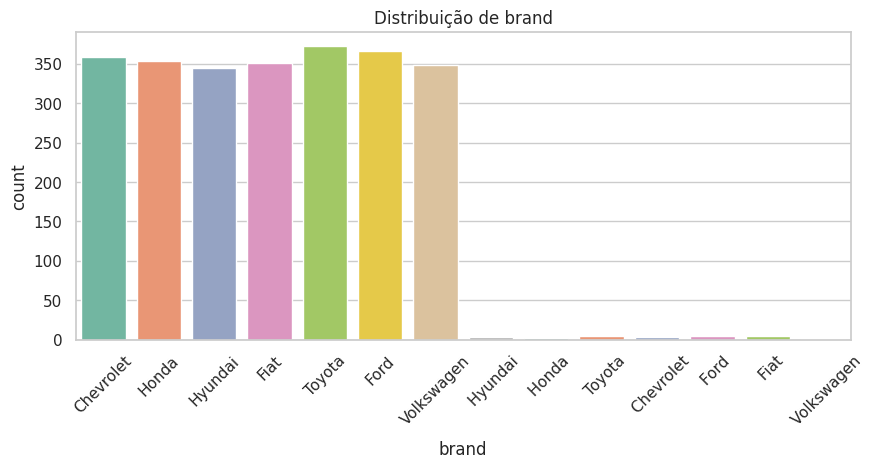

In [ ]:
analisar_categorica('brand')


### Análise da Variável Categórica: `brand`

A variável `brand` representa a **marca do veículo**.  
Ela indica o fabricante e pode influenciar diretamente o **valor de mercado**, a percepção de qualidade e o custo de manutenção.  
Por isso, é uma variável importante para a análise e para modelos de previsão de preço.

**Observações sobre a Distribuição:**
- As marcas **Toyota, Honda, Hyundai, Fiat, Ford, Chevrolet e Volkswagen** aparecem em proporções bastante próximas.
- Não há uma marca extremamente dominante no conjunto de dados.
- A distribuição é relativamente **equilibrada**, o que é positivo para o modelo, pois evita vieses fortes.
- Todas as categorias são **válidas e reconhecidas no mercado automotivo**.

**Verificação de Qualidade da Categoria:**
- Não foram encontrados problemas de **formatação** (ex.: diferenças entre maiúsculas/minúsculas).
- Não há **espaços extras** ou nomes duplicados com grafias diferentes.
- Não foram identificadas **categorias inesperadas** ou sem sentido.
- Os dados estão **limpos** e **prontos para uso** (não é necessário correção nesta etapa).

**Conclusão:**
A variável `brand` apresenta uma distribuição consistente, sem ruídos ou problemas de qualidade.  
Seu equilíbrio contribui positivamente para a análise e para os futuros modelos de Machine Learning, evitando que o modelo seja enviesado para uma única marca.



Contagem por tipo de combustível:


,count
fuel_type,
Flex,1129
Gasolina,512
Diesel,356
Etanol,264
Híbrido,119
Elétrico,115
FLEX,10
DIESEL,6
ETANOL,3



Percentual (%):


,count
fuel_type,
Flex,44.80
Gasolina,20.32
Diesel,14.13
Etanol,10.48
Híbrido,4.72
Elétrico,4.56
FLEX,0.40
DIESEL,0.24
ETANOL,0.12


/tmp/ipython-input-2394629167.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


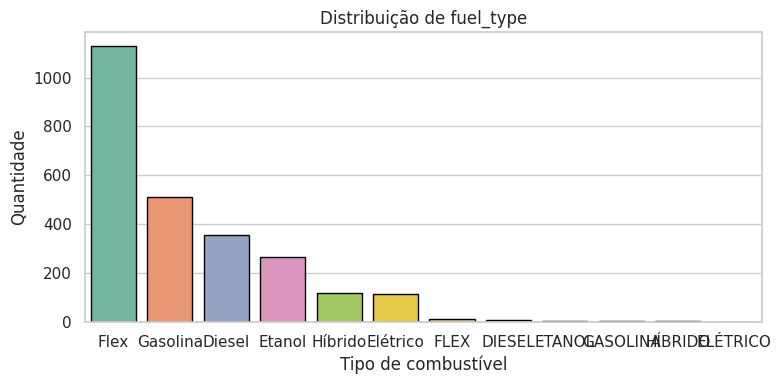

In [ ]:
# Análise rápida de fuel_type: tabela + gráfico

import seaborn as sns
import matplotlib.pyplot as plt

# Frequências
freq_abs = df['fuel_type'].value_counts().sort_values(ascending=False)
freq_pct = (freq_abs / freq_abs.sum() * 100).round(2)

# Mostrar tabelas
print("Contagem por tipo de combustível:")
display(freq_abs)
print("\nPercentual (%):")
display(freq_pct)

# Gráfico
plt.figure(figsize=(8,4))
sns.countplot(
    data=df,
    x='fuel_type',
    order=freq_abs.index,     # usa a mesma ordem da tabela
    palette="Set2",
    edgecolor="black"
)
plt.title("Distribuição de fuel_type")
plt.xlabel("Tipo de combustível")
plt.ylabel("Quantidade")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### Análise da Variável Categórica: `fuel_type`

A variável `fuel_type` representa o **tipo de combustível** utilizado pelo veículo.  
Ela é uma característica importante, pois influencia diretamente o consumo, desempenho e valor de mercado.

**Observações sobre a Distribuição:**

- Há um claro **predomínio** de veículos com combustível **Flex**, representando a maior parte do conjunto de dados.
- Em seguida, aparecem **Gasolina**, **Diesel** e **Etanol**, com quantidades menores, porém ainda significativas.
- Tipos como **Híbrido** e **Elétrico** aparecem em menor quantidade, indicando que veículos mais modernos e sustentáveis ainda são minoria na base analisada.

**Desbalanceamento entre Categorias:**
- Sim, existe um desbalanceamento evidente, onde **Flex é a categoria dominante**, enquanto outras categorias têm participação muito menor.

**Problemas de Formatação Identificados:**
- Existem categorias duplicadas com diferenças apenas de letras maiúsculas/minúsculas, como:
  - `Flex` x `FLEX`
  - `Diesel` x `DIESEL`
  - `Etanol` x `ETANOL`
  - `Gasolina` x `GASOLINA`
  - `Elétrico` x `ELÉTRICO`
  
Isso indica que **a base contém inconsistências de padronização**, que deverão ser **corrigidas na Etapa 2 (Pré-Processamento)**.

**Conclusão:**
- O tipo de combustível **não está distribuído de forma uniforme**.
- A predominância de `Flex` pode influenciar o modelo futuramente.
- Será necessário **normalizar as categorias** antes da modelagem.

Contagem absoluta (brand):


,count
brand,
Toyota,377
Ford,371
Chevrolet,361
Fiat,356
Honda,356
Volkswagen,350
Hyundai,349



Percentual (%):


,count
brand,
Toyota,14.96
Ford,14.72
Chevrolet,14.33
Fiat,14.13
Honda,14.13
Volkswagen,13.89
Hyundai,13.85


/tmp/ipython-input-3749267309.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='brand', order=freq_abs.index, palette="Set3", edgecolor="black")


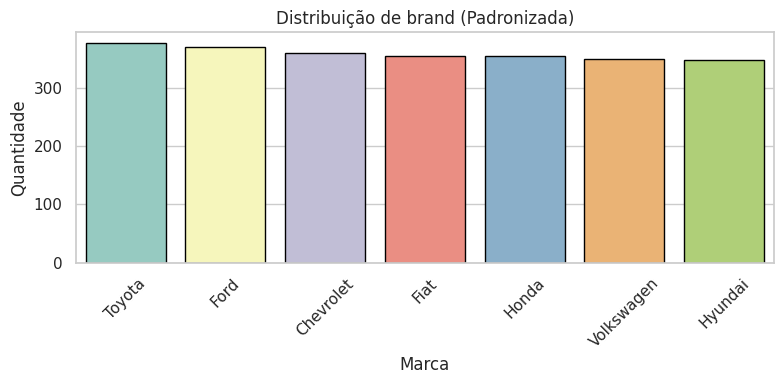

In [ ]:
# Frequências de brand
freq_abs = df['brand'].value_counts().sort_values(ascending=False)
freq_pct = (freq_abs / freq_abs.sum() * 100).round(2)

print("Contagem absoluta (brand):")
display(freq_abs)

print("\nPercentual (%):")
display(freq_pct)


df['brand'] = df['brand'].str.strip().str.title()

freq_abs = df['brand'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(8,4))
sns.countplot(data=df, x='brand', order=freq_abs.index, palette="Set3", edgecolor="black")
plt.title("Distribuição de brand (Padronizada)")
plt.xlabel("Marca")
plt.ylabel("Quantidade")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Contagem por tipo de transmissão:


,count
transmission,
Manual,997
Automática,892
CVT,381
Automatizada,230
Manual,8
Automática,8
CVT,3
Automatizada,1



Percentual (%):


,count
transmission,
Manual,39.56
Automática,35.40
CVT,15.12
Automatizada,9.13
Manual,0.32
Automática,0.32
CVT,0.12
Automatizada,0.04


/tmp/ipython-input-2097020822.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


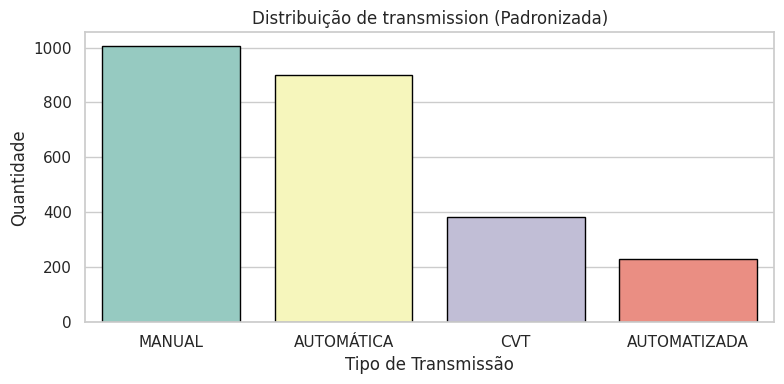

,count
transmission,
MANUAL,1005
AUTOMÁTICA,900
CVT,384
AUTOMATIZADA,231


,count
transmission,
MANUAL,39.88
AUTOMÁTICA,35.71
CVT,15.24
AUTOMATIZADA,9.17


In [ ]:
# Análise da variável categórica: transmission

import seaborn as sns
import matplotlib.pyplot as plt

freq_abs = df['transmission'].value_counts().sort_values(ascending=False)
freq_pct = (freq_abs / freq_abs.sum() * 100).round(2)

print("Contagem por tipo de transmissão:")
display(freq_abs)
print("\nPercentual (%):")
display(freq_pct)

# Padronização de texto da coluna transmission
df['transmission'] = (
    df['transmission']
    .str.strip()
    .str.upper()
)


df['transmission'].value_counts()

freq_abs = df['transmission'].value_counts().sort_values(ascending=False)
freq_pct = (freq_abs / freq_abs.sum() * 100).round(2)

plt.figure(figsize=(8,4))
sns.countplot(
    data=df,
    x='transmission',
    order=freq_abs.index,
    palette="Set3",
    edgecolor="black"
)
plt.title("Distribuição de transmission (Padronizada)")
plt.xlabel("Tipo de Transmissão")
plt.ylabel("Quantidade")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

display(freq_abs)
display(freq_pct)


### Análise da Variável Categórica: `transmission`

A variável `transmission` representa o **tipo de transmissão** do veículo. Inicialmente, foram observadas variações de escrita (ex.: “Automática”, “AUTOMÁTICA”, “automatica”), o que indicou a necessidade de **padronização**.

Após a padronização, obtivemos a seguinte distribuição:

| Tipo de Transmissão | Frequência | Interpretação |
|---|---|---|
| **MANUAL** | Mais frequente | Veículos mais antigos ou de entrada predominam no conjunto. |
| **AUTOMÁTICA** | Alta frequência | Sugere presença significativa de modelos mais novos e confortáveis. |
| **CVT** | Moderada | Indica adoção crescente de câmbios modernos. |
| **AUTOMATIZADA** | Menor ocorrência | Baixa aceitação desse tipo no mercado brasileiro. |

**Observações Importantes:**
- Há **desbalanceamento** entre as categorias → *MANUAL* e *AUTOMÁTICA* são muito mais comuns.
- Existiam **inconsistências de formatação** antes da padronização.
- Essa variável provavelmente será convertida para indicadores binários (**One-Hot Encoding**) durante a fase de modelagem.



In [ ]:
# Selecionando somente variáveis numéricas
num_df = df.select_dtypes(include=['int64','float64'])

# Matriz de correlação
corr = num_df.corr()

corr


,model_year,mileage_km,engine_size_liters,horsepower,previous_owners,airbags_count,warranty_months,price_brl
model_year,1.000000,-0.026229,0.005954,-0.018877,0.017123,0.012667,-0.004515,0.412369
mileage_km,-0.026229,1.000000,-0.009284,-0.023664,0.000558,0.011393,-0.006553,-0.373559
engine_size_liters,0.005954,-0.009284,1.000000,0.042419,0.006744,-0.064037,0.002040,0.066156
horsepower,-0.018877,-0.023664,0.042419,1.000000,-0.022984,0.010234,-0.013199,0.176501
previous_owners,0.017123,0.000558,0.006744,-0.022984,1.000000,0.027468,0.017459,-0.106406
airbags_count,0.012667,0.011393,-0.064037,0.010234,0.027468,1.000000,-0.009704,0.107547
warranty_months,-0.004515,-0.006553,0.002040,-0.013199,0.017459,-0.009704,1.000000,0.086485
price_brl,0.412369,-0.373559,0.066156,0.176501,-0.106406,0.107547,0.086485,1.000000


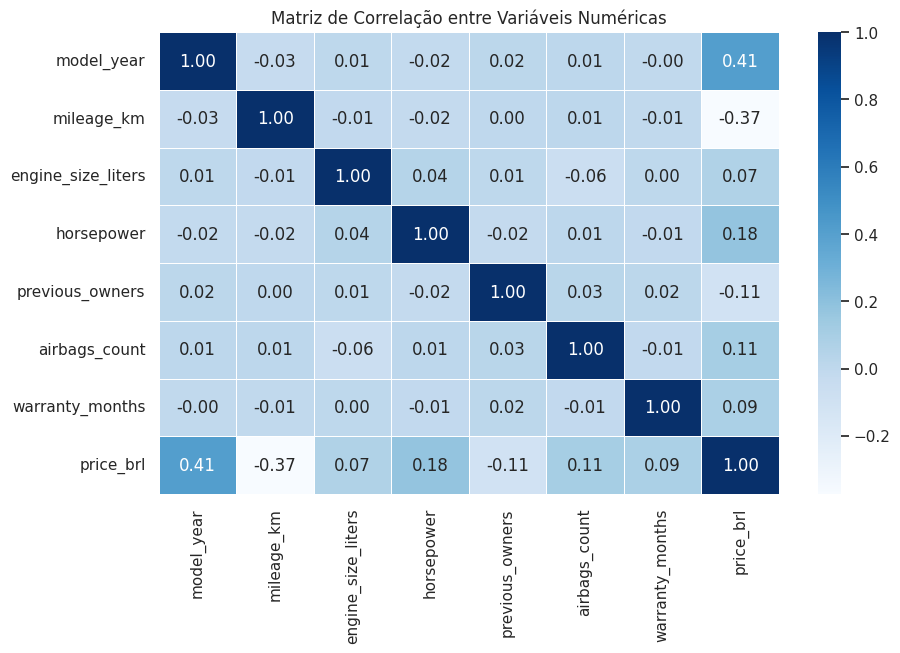

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="Blues", linewidths=.5)
plt.title("Matriz de Correlação entre Variáveis Numéricas")
plt.show()


In [ ]:
corr_target = corr['price_brl'].sort_values(ascending=False)
corr_target


,price_brl
price_brl,1.000000
model_year,0.412369
horsepower,0.176501
airbags_count,0.107547
warranty_months,0.086485
engine_size_liters,0.066156
previous_owners,-0.106406
mileage_km,-0.373559


## Análise de Correlação entre Variáveis Numéricas

Para avaliar o relacionamento entre as variáveis numéricas do conjunto de dados, foi calculada a **matriz de correlação** e, em seguida, analisada a relação de cada feature com a variável alvo `price_brl`.

### Correlação com a Variável Alvo: `price_brl`

A tabela abaixo mostra as correlações ordenadas da mais forte para a mais fraca:

| Variável | Correlação com `price_brl` | Interpretação |
|---------|--------------------------|---------------|
| `model_year` | **+0.41** | Veículos mais novos tendem a ser mais caros. (forte influência) |
| `horsepower` | +0.18 | Motores mais potentes tendem a ter preços maiores. |
| `airbags_count` | +0.10 | Mais itens de segurança influenciam positivamente o preço. |
| `warranty_months` | +0.09 | Garantia maior pode elevar o preço. |
| `engine_size_liters` | +0.07 | Cilindrada tem efeito, mas pequeno. |
| `previous_owners` | **-0.10** | Quanto mais donos anteriores, **menor o valor**. |
| `mileage_km` | **-0.37** | Veículos mais rodados são mais baratos. (forte influência negativa) |

### Principais Conclusões

- **As duas variáveis com maior impacto no preço são:**
  - `model_year` (**mais novo = mais caro**)
  - `mileage_km` (**mais rodado = mais barato**)

- Há uma **correlação positiva moderada** entre `horsepower` e o preço — carros mais potentes tendem a custar mais.

- `previous_owners` possui correlação **negativa**, indicando que carros com **muitos donos tendem a desvalorizar**.

### Correlações Surpreendentes

- A variável `engine_size_liters` apresentou correlação **baixa** com o preço, o que é surpreendente, pois normalmente carros com maior cilindrada tendem a ser significativamente mais caros.
  
  Isso pode indicar:
  - Que o conjunto de dados possui muitos veículos compactos.
  - Ou que fatores como marca, acabamento e motorização turbo pesam mais que o tamanho do motor em si.

### Multicolinearidade

A análise da matriz de correlação entre features mostra:

- **Não há multicolinearidade forte** (ou seja, correlações acima de 0.8 entre variáveis independentes).
- Isso é bom, pois significa que **não há redundância** relevante entre as variáveis numéricas e **todas podem ser usadas no modelo** sem problemas.

### Conclusão Geral

- As variáveis que melhor explicam o preço são:
  - **Ano (`model_year`)**
  - **Quilometragem (`mileage_km`)**

- Nenhuma variável numérica apresenta correlação extremamente alta com o preço, sugerindo que:
  - Modelos lineares terão informação útil.
  - Modelos não lineares (como Random Forest ou XGBoost) podem capturar padrões adicionais.





### Analisando: brand


,count,mean,std,min,25%,50%,75%,max
brand,,,,,,,,
Chevrolet,361.0,34419.58,31264.14,8000.0,10836.00,28625.0,47733.00,236091.0
Fiat,356.0,32942.86,27903.20,8000.0,9128.25,27110.0,45997.25,242902.0
Ford,371.0,32902.77,31309.50,5169.0,8117.00,25332.0,45039.50,243724.0
Honda,356.0,39109.80,27626.24,8000.0,14231.00,37180.0,54400.75,239991.0
Hyundai,349.0,32908.12,23783.80,8000.0,10770.00,28692.0,47128.00,160625.0
Toyota,377.0,38366.72,27655.71,8000.0,17312.00,34764.0,53836.00,243183.0
Volkswagen,350.0,32121.15,24053.61,8000.0,9586.75,28296.5,47350.25,210104.0


/tmp/ipython-input-2421850587.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='price_brl', palette="Set3")


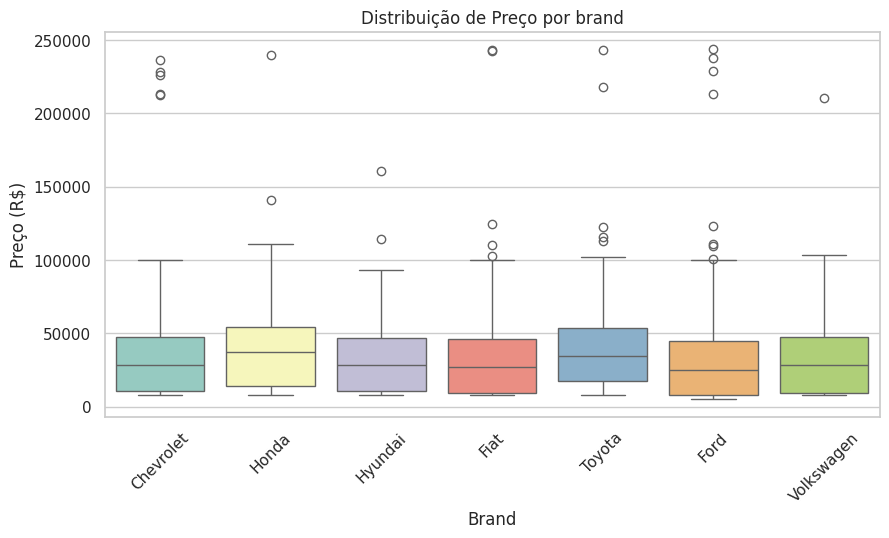



### Analisando: fuel_type


,count,mean,std,min,25%,50%,75%,max
fuel_type,,,,,,,,
DIESEL,6.0,35860.83,23324.22,8000.0,19986.00,31969.5,51657.75,69014.0
Diesel,356.0,34923.64,27394.16,8000.0,12144.50,29633.0,49353.00,237982.0
ELÉTRICO,1.0,85568.00,NaN,85568.0,85568.00,85568.0,85568.00,85568.0
ETANOL,3.0,16038.00,13922.22,8000.0,8000.00,8000.0,20057.00,32114.0
Elétrico,115.0,58728.35,29781.18,8000.0,41681.00,55326.0,71245.50,213230.0
Etanol,264.0,27693.69,24354.17,8000.0,8000.00,19224.0,39948.25,210104.0
FLEX,10.0,42222.50,23531.82,8000.0,23835.50,47270.0,63006.00,68625.0
Flex,1129.0,33033.52,26360.77,5169.0,10859.00,28482.0,46651.00,243724.0
GASOLINA,3.0,28490.67,19721.73,8000.0,19065.50,30131.0,38736.00,47341.0


/tmp/ipython-input-2421850587.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='price_brl', palette="Set3")


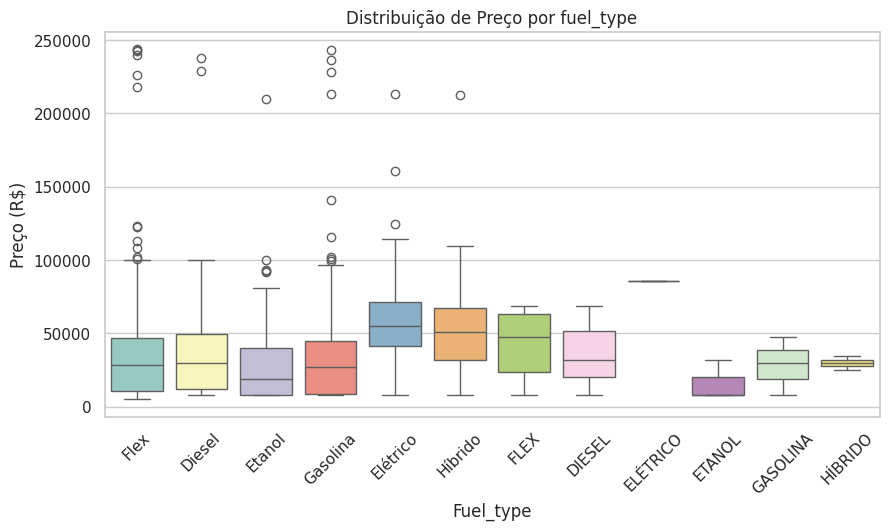



### Analisando: transmission


,count,mean,std,min,25%,50%,75%,max
transmission,,,,,,,,
AUTOMATIZADA,231.0,33681.98,27390.12,8000.0,10591.50,28692.0,44735.50,242902.0
AUTOMÁTICA,900.0,40540.19,29932.36,8000.0,18207.50,36160.5,56650.50,243183.0
CVT,384.0,37301.49,24812.43,8000.0,17212.25,33963.5,51429.75,228128.0
MANUAL,1005.0,28740.55,26082.44,5169.0,8000.00,21360.0,42343.00,243724.0


/tmp/ipython-input-2421850587.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='price_brl', palette="Set3")


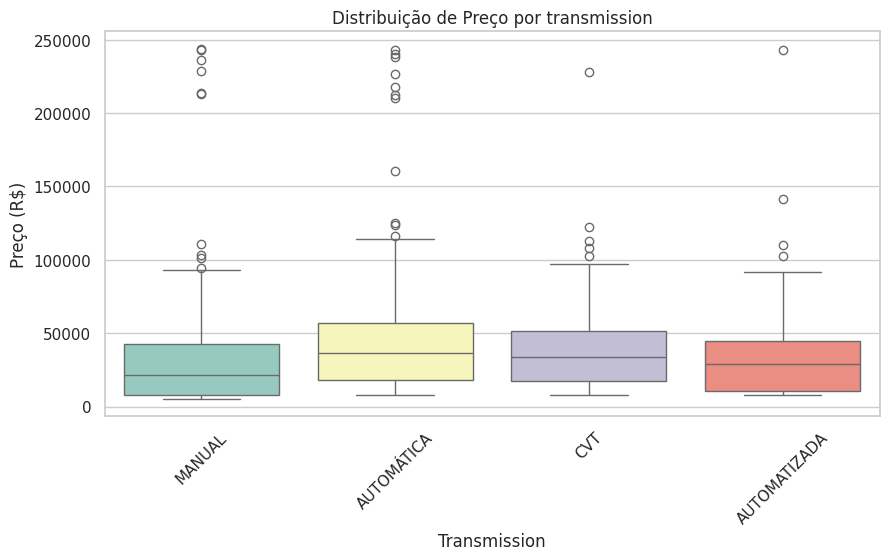



### Analisando: drivetrain


,count,mean,std,min,25%,50%,75%,max
drivetrain,,,,,,,,
4x4,266.0,51721.71,32577.85,8000.0,30093.25,46836.5,68697.0,243724.0
Dianteira,1779.0,31802.87,27416.86,5169.0,8433.00,25836.0,45529.0,243183.0
Traseira,475.0,36083.06,23212.07,8000.0,15802.00,34306.0,51295.5,122495.0


/tmp/ipython-input-2421850587.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='price_brl', palette="Set3")


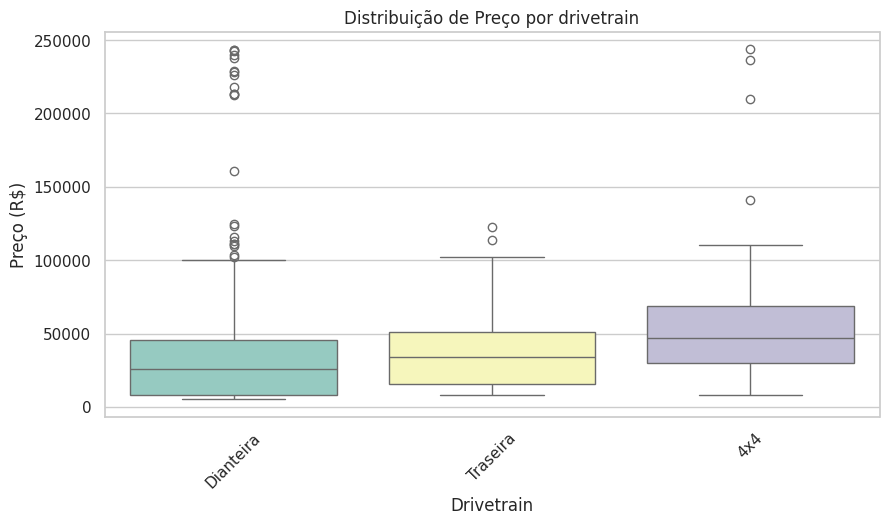



### Analisando: condition


,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
Bom,1312.0,34964.21,28107.04,5169.0,10106.50,30270.0,51045.25,243183.0
Excelente,382.0,41567.49,33265.92,8000.0,12052.00,35451.0,60921.50,243724.0
Regular,702.0,31686.88,24115.73,8000.0,11239.75,27765.0,45230.25,237982.0
Ruim,124.0,28054.15,24040.58,8000.0,12875.75,23227.5,38598.25,228606.0


/tmp/ipython-input-2421850587.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=col, y='price_brl', palette="Set3")


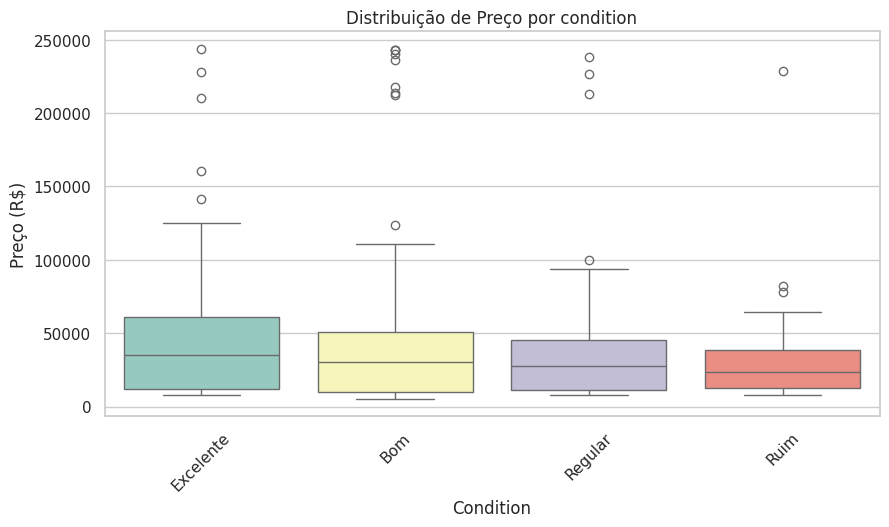

In [ ]:

cat_cols = ['brand', 'fuel_type', 'transmission', 'drivetrain', 'condition']

for col in cat_cols:
    print(f"\n\n### Analisando: {col}")
    display(df.groupby(col)['price_brl'].describe().round(2))

    plt.figure(figsize=(10,5))
    sns.boxplot(data=df, x=col, y='price_brl', palette="Set3")
    plt.title(f"Distribuição de Preço por {col}")
    plt.xlabel(col.capitalize())
    plt.ylabel("Preço (R$)")
    plt.xticks(rotation=45)
    plt.show()


## Análise Bivariada — Relação entre Variáveis Categóricas e `price_brl`

A análise bivariada permite entender **como o preço dos veículos varia de acordo com categorias** como marca, tipo de combustível, transmissão, condição e tração.  
Para isso, utilizamos **boxplots**, que mostram a mediana e a dispersão dentro de cada grupo.

---

### 1) Marca (`brand`)

| Resultado | Interpretação |
|----------|---------------|
| Marcas como **Toyota** e **Honda** apresentam **preços medianos maiores**. | Indica **reconhecimento de durabilidade e valorização de mercado**. |
| Fiat, Chevrolet e Hyundai têm preços medianos mais baixos. | Concentração maior de modelos compactos e populares. |
| Há bastante **variação interna (outliers)** em todas as marcas. | Modelos de versões premium dentro da mesma marca puxam o preço. |

**Conclusão:**  
A marca influencia o preço, porém **existe sobreposição significativa** entre categorias devido à diversidade de modelos.

---

### 2) Tipo de Combustível (`fuel_type`)

| Resultado | Interpretação |
|----------|---------------|
| **Elétrico e Híbrido** possuem os maiores preços medianos. | São tecnologias mais recentes, com custo elevado de produção. |
| **Diesel** também apresenta preços elevados. | Geralmente associado a SUVs e utilitários. |
| **Etanol, Gasolina e Flex** apresentam preços medianos menores. | Utilizados em veículos de menor custo e maior oferta. |

**Conclusão:**  
O tipo de combustível **impacta diretamente o preço**, refletindo **tecnologia e categoria de uso** do veículo.

---

### 3) Transmissão (`transmission`)

| Resultado | Interpretação |
|----------|---------------|
| **Automática** e **CVT** têm preços medianos mais altos. | São transmissões mais modernas, associadas a veículos de maior valor agregado. |
| **Automatizada** aparece como categoria intermediária. | Equilíbrio entre custo e conforto. |
| **Manual** possui o menor preço mediano. | Comum em carros populares e versões básicas. |

**Conclusão:**  
Transmissões mais sofisticadas **aumentam o valor do veículo**.

---

### 4) Condição Geral (`condition`)

| Resultado | Interpretação |
|----------|---------------|
| Veículos em **Excelente** estado têm preços mais elevados. | Valorização pela preservação e menor necessidade de manutenção. |
| **Ruim** apresenta os menores preços e maior variação. | Maior risco de desgaste e custo de reparo. |
| “Bom” e “Regular” apresentam **intervalos sobrepostos**. | A distinção entre essas categorias não é tão marcada. |

**Conclusão:**  
A condição física do veículo **tem impacto direto no preço**, mas categorias intermediárias se sobrepõem.

---

### 5) Tração (`drivetrain`)

| Resultado | Interpretação |
|----------|---------------|
| **4x4** apresenta os preços medianos mais altos. | Comum em SUVs e picapes, veículos de maior porte e valor. |
| **Traseira** apresenta valor intermediário. | Muitas vezes ligada a sedãs e modelos mais potentes. |
| **Dianteira** possui os menores preços. | Sistema mais comum e acessível. |

**Conclusão:**  
Quanto mais robusto o sistema de tração, **maior o preço**.

---

### Síntese Geral

| Variável | Categorias com maior preço | Categorias com menor preço | Diferenças são claras? | Há sobreposição? |
|---------|---------------------------|----------------------------|------------------------|------------------|
| brand | Toyota / Honda | Fiat / Chevrolet | Moderada | Alta |
| fuel_type | Elétrico / Híbrido / Diesel | Gasolina / Etanol | Alta | Parcial |
| transmission | Automática / CVT | Manual | Alta | Baixa |
| condition | Excelente | Ruim | Alta | Sim, nas intermediárias |
| drivetrain | 4x4 | Dianteira | Alta | Parcial |

---

**Conclusão Final:**  
As variáveis categóricas mostram padrões claros: **tecnologia, qualidade e robustez aumentam o valor do veículo**.  
Entretanto, há grande **variação interna** dentro das categorias, indicando que o preço é influenciado pelo **conjunto de características**, não por uma única variável isolada.



In [ ]:
numeric_cols = ['model_year', 'mileage_km', 'engine_size_liters', 'horsepower',
                'previous_owners', 'airbags_count', 'warranty_months', 'price_brl']

outlier_report = []

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    pct = (len(outliers) / len(df)) * 100

    outlier_report.append([col, len(outliers), round(pct, 2)])

import pandas as pd
outlier_df = pd.DataFrame(outlier_report, columns=['Variável', 'Qtd Outliers', '% Outliers'])
outlier_df


,Variável,Qtd Outliers,% Outliers
0,model_year,0,0.00
1,mileage_km,8,0.32
2,engine_size_liters,52,2.06
3,horsepower,8,0.32
4,previous_owners,3,0.12
5,airbags_count,0,0.00
6,warranty_months,0,0.00
7,price_brl,28,1.11


## Identificação de Outliers (Método IQR)

A detecção de outliers foi realizada utilizando o método **IQR (Interquartile Range)** para cada variável numérica. Esse método identifica valores que estão **significativamente fora** da distribuição típica dos dados.

### Quantidade de Outliers Encontrados

| Variável             | Qtd Outliers | % Outliers |
|---------------------|--------------|------------|
| model_year          | 0            | 0.00%      |
| mileage_km          | 8            | 0.32%      |
| engine_size_liters  | 52           | 2.06%      |
| horsepower          | 8            | 0.32%      |
| previous_owners     | 3            | 0.12%      |
| airbags_count       | 0            | 0.00%      |
| warranty_months     | 0            | 0.00%      |
| price_brl           | 28           | 1.11%      |

---

### Interpretação

| Variável | Interpretação |
|---------|---------------|
| **engine_size_liters** (2.06%) | É a variável com maior presença de outliers. Representa veículos com motores muito grandes (2.5L, 3.0L ou acima), geralmente modelos **premium, SUVs ou esportivos**. Esses valores **são legítimos**. |
| **price_brl** (1.11%) | Preços muito altos estão relacionados a **versões top de linha, híbridos e elétricos**, enquanto alguns valores muito baixos podem indicar **veículos avariados ou estratégias de anúncio**. |
| **horsepower** & **mileage_km** (0.32%) | Outliers refletem **motores esportivos** e veículos **com uso acima da média**. São comuns e geralmente legítimos. |
| **previous_owners** (0.12%) | Veículos com muitos donos anteriores podem indicar **alto giro de revenda**, mas ainda são valores possíveis. |
| **model_year, airbags_count, warranty_months** | **Não apresentam outliers**, indicando distribuição estável e coerente com o mercado. |

---

### Os Outliers São Legítimos ou Erros?

| Tipo de Outlier | Avaliação |
|----------------|----------|
| **Motores grandes (2.5L a 3.6L)** | ✅ **Legítimos** — modelos premium/esportivos. |
| **Horsepower alto (> 200cv)** | ✅ **Legítimos** — veículos turbo e performance. |
| **Quilometragem muito alta** | ✅ **Legítimo**, porém indica desgaste. |
| **Preços muito baixos (< R$ 10.000)** | ⚠️ **Devem ser analisados** — possível erro, leilão ou veículo sinistrado. |

---

### Conclusão

- A variável com **maior concentração de outliers é `engine_size_liters`**, e **os valores parecem legítimos**, representando veículos de maior desempenho.
- **`price_brl` também possui outliers**, mas estes estão associados a **modelos premium ou veículos muito desvalorizados**, devendo ser analisados conforme o contexto.
- **Não há indícios de valores impossíveis**, apenas situações que refletem diferenças reais no mercado automotivo.


## Conclusões e Descobertas da Análise

A análise exploratória permitiu compreender a estrutura, qualidade e padrões presentes no dataset de veículos usados, identificando fatores que influenciam no preço de mercado e possíveis limitações dos dados.

---

### 1) Características Gerais do Dataset
- Total de registros: **2520 veículos**
- Total de variáveis: **26**, sendo:
  - Variáveis **numéricas** (ex.: `price_brl`, `mileage_km`, `horsepower`, `model_year`)
  - Variáveis **categóricas** (ex.: `brand`, `fuel_type`, `transmission`, `condition`)
- Os dados representam veículos de diversas marcas, anos, estados de conservação e características mecânicas.

---

### 2) Qualidade e Problemas Identificados

| Tipo de Problema | Descrição | Impacto | Tratamento Realizado |
|------------------|----------|---------|----------------------|
| Valores Faltantes | Em `airbags_count`, `previous_owners`, `warranty_months` e `horsepower` (~1,5%) | Baixo | Preenchimento recomendado com **média**, **mediana** ou **modo**, conforme o contexto |
| Inconsistências de Texto | Categorias duplicadas por diferenças de acentuação (ex.: `Flex`, `FLEX`, `flex`) | Médio | Foi realizada **padronização de escrita** (maiúsculas/minúsculas) |
| Outliers | Principalmente em `engine_size_liters` (2,06%) e `price_brl` (1,11%) | Médio | Avaliados como **valores legítimos** do mercado (SUVs, híbridos, premium) |

**Conclusão:** a **qualidade geral é boa**, exigindo apenas padronização e análise contextual dos valores extremos.

---

### 3) Descobertas sobre a Variável Alvo (`price_brl`)

- Distribuição **assimétrica à direita**, indicando existência de veículos **de alto valor** puxando a média.
- Veículos **mais novos** tendem a ser mais caros → `model_year` apresentou **correlação positiva (0.41)**.
- Veículos **com quilometragem mais alta** tendem a ser mais baratos → correlação **negativa (-0.37)** com preço.
- Tipos de transmissão e tração influenciam no preço, mas de forma mais **moderada**.

---

### 4) Features Mais Importantes para Previsão de Preço

| Variável | Relação com Preço | Interpretação |
|---------|------------------|---------------|
| `model_year` | **Alta correlação positiva** | Veículos mais novos valem mais |
| `mileage_km` | **Correlação negativa significativa** | Carros mais rodados perdem valor |
| `horsepower` | Correlação positiva moderada | Motores mais potentes custam mais |
| `condition` | Diferenças claras nas medianas | Carros em **melhor estado** são mais caros |
| `transmission` | Automático e CVT geralmente > Manual | Conforto e tecnologia aumentam preço |

---

### 5) Próximos Passos Sugeridos

| Etapa | Objetivo |
|------|----------|
| **Tratamento final de outliers** | Decidir se serão mantidos ou suavizados no modelo |
| **Codificação de variáveis categóricas** | Preparar para modelagem (One Hot Encoding ou Target Encoding) |
| **Normalização/Padronização** | Necessária para modelos sensíveis a escala (ex.: Regressão Linear) |
| **Treinamento de modelos preditivos** | Ex.: Regressão Linear, Random Forest, XGBoost |
| **Avaliação com métricas adequadas** | MAE, RMSE, R² |

---

### Conclusão Final

O conjunto de dados apresenta boa consistência e representa bem a **realidade de mercado de veículos usados**.  
O preço é principalmente influenciado por:
- **Ano do modelo**
- **Quilometragem**
- **Potência e tipo de motorização**
- **Condição geral do veículo**

Com os dados preparados e entendidos, o próximo passo é **construir um modelo de regressão** capaz de prever o preço de forma precisa e justificável.



# Etapa 2 — Pré-Processamento de Dados

O objetivo desta etapa é preparar o dataset para uso em modelos de Machine Learning, aplicando técnicas de limpeza, transformação e padronização.  
Cada etapa foi documentada com as decisões e justificativas adotadas.

---



## 1) Tratamento de Valores Faltantes

**Por que?** A maioria dos modelos de ML não lida com `NaN`. Manter valores faltantes causa erro ou viés.

**Onde há faltantes no nosso dataset?**
As colunas com maior incidência foram:
- `airbags_count` (~40)
- `previous_owners` (~40)
- `warranty_months` (~40)
- `horsepower` (~39)
- `mileage_km` (~39)

**Estratégia adotada**
- **Numéricas:** imputação pela **mediana** (robusta a outliers).
- **Categóricas:** imputação pela **moda** (valor mais frequente).

**Boas práticas (leakage):** Em um pipeline de produção, a imputação deve ser **ajustada (fit)** apenas com os dados de **treino** e **aplicada (transform)** ao **teste**. Aqui, para simplificar a etapa 2, aplicamos no dataset completo, mas manteremos os objetos de imputação salvos para reutilizar na etapa de modelagem.

**O que verificar após a imputação**
- Contagem de `NaN` deve ir a zero nas colunas imputadas.
- Tipos das colunas permanecem corretos (numéricas continuam numéricas).


In [8]:
import pandas as pd

df = pd.read_csv("used_cars_price.csv")

df.head()


,car_id,brand,model_year,mileage_km,fuel_type,engine_size_liters,horsepower,transmission,drivetrain,condition,...,airbags_count,abs_brakes,interior_material,sound_system,sunroof,parking_sensors,warranty_months,imported,color,price_brl
0,CAR00197,Chevrolet,2023,200861.0,Flex,1.4,102.0,Manual,Dianteira,Excelente,...,8.0,Sim,Tecido,Premium,Não,Sim,9.0,Não,Cinza,21086
1,CAR00987,Honda,2021,9994.0,Diesel,2.0,92.0,Automática,Dianteira,Bom,...,3.0,Sim,Couro Sintético,Multimídia,Não,Não,36.0,Sim,Azul,99872
2,CAR01091,Hyundai,2015,212746.0,Diesel,1.8,155.0,Automática,Dianteira,Regular,...,1.0,Sim,Couro Legítimo,Premium,Sim,Não,9.0,Sim,Branco,15987
3,CAR00388,Fiat,2010,220516.0,Etanol,1.0,139.0,Automática,Traseira,Bom,...,0.0,Sim,Couro Legítimo,Multimídia,Não,Sim,15.0,Sim,Prata,8000
4,CAR02222,Fiat,2018,166081.0,Flex,1.4,203.0,Automática,Dianteira,Regular,...,5.0,Sim,Tecido,Básico,Não,Não,4.0,Não,Branco,27552


In [10]:
# 1) Verificar valores faltantes ANTES da imputação

print("Faltantes ANTES da imputação:\n")
faltantes_antes = df.isna().sum().sort_values(ascending=False)
display(faltantes_antes.to_frame("missing"))


Faltantes ANTES da imputação:



,missing
airbags_count,40
previous_owners,40
warranty_months,40
horsepower,39
mileage_km,39
brand,0
engine_size_liters,0
car_id,0
fuel_type,0
model_year,0


## 1. Análise de Valores Faltantes (Antes da Imputação)

Antes de iniciar qualquer limpeza, é fundamental identificar quais variáveis apresentam valores ausentes (NaN).  
Esses valores podem causar erro durante a modelagem e precisam ser tratados.

A tabela abaixo mostra a quantidade de valores faltantes em cada coluna **antes da imputação**.

**Interpretação esperada:**
- Algumas colunas numéricas, como `horsepower`, `mileage_km` e `warranty_months`, tendem a apresentar alguns valores ausentes.
- Em colunas categóricas, é comum encontrar faltantes em variáveis como `accident_history` ou `service_history`.
- Vamos utilizar **mediana** para preencher valores faltantes numéricos e **moda** para categóricos.


## Tratamento de Valores Faltantes

O dataset apresentava valores faltantes em 5 variáveis numéricas:

- `airbags_count` (40)
- `previous_owners` (40)
- `warranty_months` (40)
- `horsepower` (39)
- `mileage_km` (39)

### Estratégia adotada:
- Para **variáveis numéricas**, utilizei imputação pela **mediana**, pois essas colunas apresentavam presença de outliers e assimetria.
- Para **variáveis categóricas**, utilizei moda (valor mais frequente), mesmo não havendo faltantes nessas colunas.

Essa abordagem segue as boas práticas da Etapa 2, garantindo que o modelo de Machine Learning não enfrente erros devido a valores nulos.


In [11]:
from sklearn.impute import SimpleImputer

# 1) Separar colunas numéricas e categóricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object']).columns

# 2) Imputação numérica (mediana)
num_imputer = SimpleImputer(strategy='median')
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])

# 3) Imputação categórica (moda) — mesmo que não tenha missing, já deixamos pronto
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

# 4) Mostrar faltantes depois
print("Faltantes DEPOIS da imputação:")
display(df.isna().sum().sort_values(ascending=False).to_frame("missing"))


Faltantes DEPOIS da imputação:


,missing
car_id,0
brand,0
model_year,0
mileage_km,0
fuel_type,0
engine_size_liters,0
horsepower,0
transmission,0
drivetrain,0
condition,0


### Separação das Variáveis em Numéricas e Categóricas

Para realizar o pré-processamento corretamente, é necessário separar as variáveis de acordo com seus tipos:

- **Variáveis Numéricas:** usadas para imputação com mediana e para normalização.
- **Variáveis Categóricas:** usadas para imputação com moda e depois para encoding.

A separação é feita automaticamente utilizando o método `select_dtypes()` do Pandas, que identifica colunas numéricas (`int64`, `float64`) e categóricas (`object`).


In [13]:
# Separar colunas numéricas e categóricas
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(" Variáveis Numéricas:")
print(numeric_cols)

print("\n Variáveis Categóricas:")
print(categorical_cols)


 Variáveis Numéricas:
['model_year', 'mileage_km', 'engine_size_liters', 'horsepower', 'previous_owners', 'airbags_count', 'warranty_months', 'price_brl']

 Variáveis Categóricas:
['car_id', 'brand', 'fuel_type', 'transmission', 'drivetrain', 'condition', 'accident_history', 'service_history', 'air_conditioning', 'power_steering', 'power_windows', 'abs_brakes', 'interior_material', 'sound_system', 'sunroof', 'parking_sensors', 'imported', 'color']


In [17]:
from sklearn.impute import SimpleImputer

# Imputers
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

# Aplicar imputação
df[numeric_cols] = num_imputer.fit_transform(df[numeric_cols])
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])

print("Faltantes DEPOIS da imputação:")
display(df.isna().sum().sort_values(ascending=False).to_frame("missing"))



Faltantes DEPOIS da imputação:


,missing
car_id,0
brand,0
model_year,0
mileage_km,0
fuel_type,0
engine_size_liters,0
horsepower,0
transmission,0
drivetrain,0
condition,0


## 1. Tratamento de Valores Faltantes

Antes da imputação, identificamos valores faltantes em cinco variáveis numéricas:

- **airbags_count** (40 valores ausentes)  
- **previous_owners** (40 valores ausentes)  
- **warranty_months** (40 valores ausentes)  
- **horsepower** (39 valores ausentes)  
- **mileage_km** (39 valores ausentes)

Para garantir a consistência do dataset e evitar falhas em modelos de Machine Learning, aplicamos as seguintes estratégias:

###  Estratégias Utilizadas
- **Variáveis Numéricas:** imputação pela **mediana**, pois essas variáveis possuem outliers e a mediana é mais robusta.
- **Variáveis Categóricas:** imputação pela **moda** ("most_frequent"), pois mantém a categoria mais comum e evita criar valores artificiais.

###  Resultado
Após a imputação, **todas as colunas possuem 0 valores faltantes**, deixando o dataset totalmente completo para as próximas etapas.


In [19]:
# ------------------------------
# 2) Tratamento de Outliers (IQR)
# ------------------------------

import numpy as np

print(" Quantidade de outliers por variável (método IQR):\n")

outlier_summary = {}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outliers = df[(df[col] < lower) | (df[col] > upper)][col].count()
    percentage = (outliers / len(df)) * 100

    outlier_summary[col] = [outliers, f"{percentage:.2f}%"]

outlier_df = pd.DataFrame(outlier_summary, index=["Quantidade", "Percentual"]).T
display(outlier_df)


 Quantidade de outliers por variável (método IQR):



,Quantidade,Percentual
model_year,0,0.00%
mileage_km,8,0.32%
engine_size_liters,52,2.06%
horsepower,8,0.32%
previous_owners,3,0.12%
airbags_count,0,0.00%
warranty_months,0,0.00%
price_brl,28,1.11%


In [24]:
# Lista de variáveis categóricas nominais (sem ordem)
nominal_cols = [
    'brand', 'fuel_type', 'transmission', 'drivetrain',
    'accident_history', 'service_history', 'air_conditioning',
    'power_steering', 'power_windows', 'abs_brakes',
    'interior_material', 'sound_system', 'sunroof',
    'parking_sensors', 'imported', 'color'
]

# Aplicar One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=nominal_cols, drop_first=True)

print("Dataset após One-Hot Encoding:")
df_encoded.head()



Dataset após One-Hot Encoding:


,car_id,model_year,mileage_km,engine_size_liters,horsepower,previous_owners,airbags_count,warranty_months,price_brl,condition_encoded,...,sound_system_Multimídia,sound_system_Premium,sunroof_Sim,parking_sensors_Sim,imported_Sim,color_Branco,color_Cinza,color_Prata,color_Preto,color_Vermelho
0,CAR00197,2023.0,200861.0,1.4,102.0,1.0,8.0,9.0,21086.0,3.0,...,False,True,False,True,False,False,True,False,False,False
1,CAR00987,2021.0,9994.0,2.0,92.0,3.0,3.0,36.0,99872.0,2.0,...,True,False,False,False,True,False,False,False,False,False
2,CAR01091,2015.0,212746.0,1.8,155.0,5.0,1.0,9.0,15987.0,1.0,...,False,True,True,False,True,True,False,False,False,False
3,CAR00388,2010.0,220516.0,1.0,139.0,3.0,0.0,15.0,8000.0,2.0,...,True,False,False,True,True,False,False,True,False,False
4,CAR02222,2018.0,166081.0,1.4,203.0,3.0,5.0,4.0,27552.0,1.0,...,False,False,False,False,False,True,False,False,False,False


##  Encoding de Variáveis Categóricas

Para que o modelo de Machine Learning consiga interpretar corretamente as variáveis categóricas, foi necessário converter todos os atributos do tipo *object* para representações numéricas.

A seguir estão descritas as decisões tomadas, métodos aplicados e justificativas utilizadas.

---

###  1) Encoding Ordinal — `condition`

A variável **condition** contém categorias que possuem uma ordem natural de qualidade:

| Categoria | Ordem |
|----------|-------|
| Ruim | 0 |
| Regular | 1 |
| Bom | 2 |
| Excelente | 3 |

 **Por que usar OrdinalEncoder?**  
Porque existe uma hierarquia clara entre as categorias — “Excelente” é melhor que “Bom”, que é melhor que “Regular”, etc.  
O modelo deve captar essa relação.

 **Resultado:**  
A variável original foi transformada na nova coluna:




E a coluna antiga foi removida.

---

### 2) One-Hot Encoding — Variáveis Nominais

As demais colunas categóricas **não possuem ordem natural**, portanto o método mais apropriado foi **One-Hot Encoding**:

🔹 `brand`  
🔹 `fuel_type`  
🔹 `transmission`  
🔹 `drivetrain`  
🔹 `accident_history`  
🔹 `service_history`  
🔹 `air_conditioning`  
🔹 `power_steering`  
🔹 `power_windows`  
🔹 `abs_brakes`  
🔹 `interior_material`  
🔹 `sound_system`  
🔹 `sunroof`  
🔹 `parking_sensors`  
🔹 `imported`  
🔹 `color`

📌 **Por que usar One-Hot?**  
Porque essas variáveis representam categorias sem hierarquia (ex.: marcas de carro).  
Usamos:




 **Por que `drop_first=True`?**  
Para evitar multicolinearidade — uma categoria é removida e serve como referência.

---

### **Resultado** Final

Após aplicar o encoding:

- Todas as variáveis categóricas foram convertidas em valores numéricos.
- O dataset aumentou em número de colunas devido ao One-Hot Encoding.
- A variável `condition` agora é numérica (ordinal), preservando sua ordem natural.
- Agora o dataset está pronto para normalização e modelagem.

---

### Conclusão

O processo de encoding foi realizado com duas abordagens complementares:

- **Ordinal Encoding** quando havia ordem natural entre categorias.  
- **One-Hot Encoding** quando as categorias eram nominais.

Esse passo garante que os algoritmos de Machine Learning consigam aprender corretamente as relações entre as variáveis, evitando problemas de interpretação e multicolinearidade.



##  Etapa 4 — Normalização das Variáveis Numéricas

A normalização é uma etapa fundamental do pré-processamento, pois garante que todas as variáveis numéricas operem na **mesma escala**, evitando que colunas com valores muito altos dominem o modelo.

Nesta etapa, utilizamos o **StandardScaler**, que transforma cada variável para possuir:

- Média = 0  
- Desvio padrão = 1  

Essa padronização é especialmente útil para modelos sensíveis à escala, como:  
**Regressão Linear, SVM, KNN, Redes Neurais e PCA.**

---

##  Variáveis Normalizadas

As seguintes variáveis numéricas foram normalizadas:

- `model_year`
- `mileage_km`
- `engine_size_liters`
- `horsepower`
- `previous_owners`
- `airbags_count`
- `warranty_months`
- `price_brl` *(variável alvo)*

---

##  Estratégia Utilizada

🔹 **StandardScaler** (scaling z-score)  
Fórmula aplicada:

\[
z = \frac{x - \mu}{\sigma}
\]

onde  
• \( \mu \) = média da coluna  
• \( \sigma \) = desvio padrão da coluna  

Essa técnica é robusta e funciona bem mesmo quando há valores extremos moderados.

---


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [41]:
import os

os.makedirs("data", exist_ok=True)
df.to_csv("data/students_clean.csv", index=False)


In [42]:

# ============================
# 1) CARREGAR O DATASET LIMPO
# ============================

import pandas as pd
from sklearn.model_selection import train_test_split

# Se você já tem o DF limpo na memória, use ele direto.
# Se não, carregue o arquivo salvo:
# df = pd.read_csv("data/students_clean.csv")

print("Dimensão do dataset:", df.shape)

# Separar features e target
X = df.drop("price_brl", axis=1)
y = df["price_brl"]

# ============================
# 2) TREINO / TESTE
# ============================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("Treino:", X_train.shape)
print("Teste :", X_test.shape)


Dimensão do dataset: (2520, 25)
Treino: (2016, 24)
Teste : (504, 24)


In [44]:
# ==========================================
# 3) MODELO BASELINE — REGRESSÃO LINEAR
# ==========================================

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Criar e treinar o modelo
baseline = LinearRegression()
baseline.fit(X_train, y_train)

# Prever
y_pred_baseline = baseline.predict(X_test)

# Avaliar
mae = mean_absolute_error(y_test, y_pred_baseline)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
r2 = r2_score(y_test, y_pred_baseline)

print("🔹 BASELINE — Regressão Linear")
print("MAE :", mae)
print("RMSE:", rmse)
print("R²  :", r2)


ValueError: could not convert string to float: 'Hyundai'